In [1]:
import sqlite3

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
# --- Step 1: Connect to SQLite database (or create if it doesn't exist) ---
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

In [5]:
# --- Step 2: Create the sales table ---
cursor.execute('''
    CREATE TABLE IF NOT EXISTS sales (
        order_id INTEGER PRIMARY KEY,
        product TEXT,
        quantity INTEGER,
        price REAL
    )
''')

In [6]:
# --- Step 3: Insert some sample sales data ---
sample_data = [
    (1, 'Laptop', 5, 1000.0),
    (2, 'Smartphone', 10, 600.0),
    (3, 'Tablet', 7, 400.0),
    (4, 'Laptop', 3, 1000.0),
    (5, 'Smartphone', 6, 600.0),
    (6, 'Headphones', 12, 150.0),
    (7, 'Tablet', 5, 400.0)
]

cursor.executemany('INSERT OR IGNORE INTO sales VALUES (?, ?, ?, ?)', sample_data)
conn.commit()

In [7]:
# --- Step 4: Run SQL query to get summary ---
query = '''
    SELECT 
        product, 
        SUM(quantity) AS total_qty, 
        SUM(quantity * price) AS revenue
    FROM sales
    GROUP BY product
'''
df = pd.read_sql_query(query, conn)

# --- Step 5: Display output ---
print("Sales Summary:\n")
print(df)

Sales Summary:

      product  total_qty  revenue
0  Headphones         12   1800.0
1      Laptop          8   8000.0
2  Smartphone         16   9600.0
3      Tablet         12   4800.0


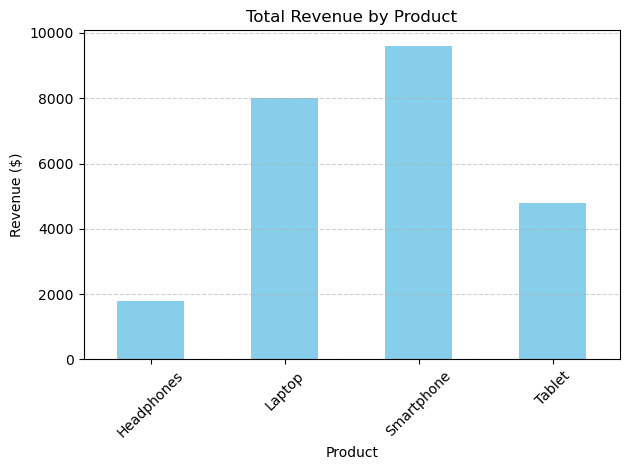

In [8]:
# --- Step 6: Plot bar chart of revenue ---
df.plot(kind='bar', x='product', y='revenue', legend=False, color='skyblue')
plt.title('Total Revenue by Product')
plt.ylabel('Revenue ($)')
plt.xlabel('Product')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.savefig("sales_chart.png")  # Optional
plt.show()

In [9]:
# --- Step 7: Close the database connection ---
conn.close()